In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('heart1.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [8]:
df['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

In [12]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=df.drop(['target'],axis=1)
y=df['target']
x=scaler.fit_transform(x)
display(x)

array([[-0.26843658,  0.66150409, -0.91575542, ...,  0.99543334,
         1.20922066,  1.08985168],
       [-0.15815703,  0.66150409, -0.91575542, ..., -2.24367514,
        -0.73197147,  1.08985168],
       [ 1.71659547,  0.66150409, -0.91575542, ..., -2.24367514,
        -0.73197147,  1.08985168],
       ...,
       [-0.81983438,  0.66150409, -0.91575542, ..., -0.6241209 ,
         0.23862459, -0.52212231],
       [-0.4889957 , -1.51170646, -0.91575542, ...,  0.99543334,
        -0.73197147, -0.52212231],
       [-0.04787747,  0.66150409, -0.91575542, ..., -0.6241209 ,
         0.23862459,  1.08985168]])

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [19]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [20]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,roc_curve
pred = model.predict(x_test)
confusion_matrix(y_test,pred)

array([[114,  28],
       [ 20, 146]], dtype=int64)

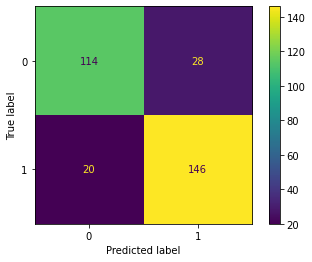

In [22]:
plot_confusion_matrix(model,x_test,y_test)

<function matplotlib.pyplot.show(close=None, block=None)>

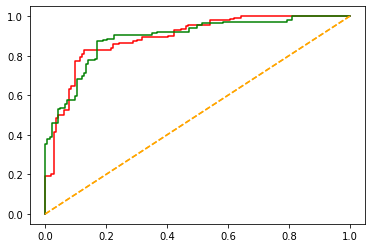

In [28]:
import matplotlib.pyplot as plt
tpr={}
fpr={}
thresh={}
y_proba = model.predict_proba(x_test)
for i in range(2):
    fpr[i],tpr[i],thresh[i]=roc_curve(y_test,y_proba[:,i],pos_label=i)
plt.plot(fpr[0],tpr[0],linestyle='-',c='red')
plt.plot(fpr[1],tpr[1],linestyle='-',c='green')
plt.plot([[0,0],[1,1]],linestyle='dashed',c='orange')
plt.show

In [32]:
from sklearn.metrics import recall_score,precision_score,f1_score,matthews_corrcoef
print("recall: ",recall_score(y_test,pred))
print("specificity: ",precision_score(y_test,pred))
print(matthews_corrcoef(y_test,pred))
print(f1_score(y_test,pred))

recall:  0.8795180722891566
specificity:  0.8390804597701149
0.6860706250795384
0.8588235294117647
